In [5]:
# Uninstall opencv-python
!pip uninstall opencv-python -y

# Install opencv-python
!pip install opencv-python


Found existing installation: opencv-python 4.10.0.84
Uninstalling opencv-python-4.10.0.84:
  Successfully uninstalled opencv-python-4.10.0.84
  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)


In [11]:
pip install --upgrade tensorflow keras


^C
Note: you may need to restart the kernel to use updated packages.


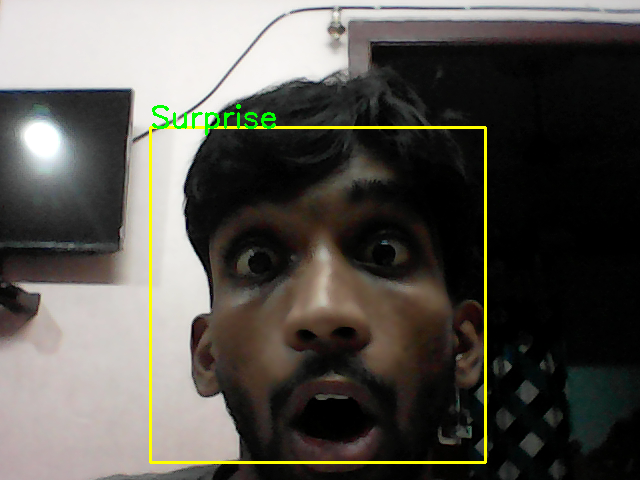

Stopping the loop after 10 seconds


In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from keras.preprocessing.image import img_to_array
import cv2
import numpy as np
import os
from IPython.display import display, clear_output
from PIL import Image as PILImage
import time  # For setting a stopping condition

# Load face classifier and model
face_classifier = cv2.CascadeClassifier(r'D:\aittpbl\haarcascade_frontalface_default (1).xml')

model_path = r'D:\aittpbl\model (2).h5'
if not os.path.exists(model_path):
    print("Model file not found.")
else:
    classifier = load_model(model_path)

emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

cap = cv2.VideoCapture(0)  # Open default camera

start_time = time.time()  # Track time for the loop

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame")
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray)

        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 255), 2)
            roi_gray = gray[y:y + h, x:x + w]
            roi_gray = cv2.resize(roi_gray, (48, 48), interpolation=cv2.INTER_AREA)

            if np.sum([roi_gray]) != 0:
                # Preprocess the region of interest
                roi = roi_gray.astype('float') / 255.0
                roi = img_to_array(roi)
                roi = np.expand_dims(roi, axis=0)

                # Predict emotion
                prediction = classifier.predict(roi)[0]
                print("Prediction scores:", prediction)

                label = emotion_labels[prediction.argmax()]
                label_position = (x, y)

                # Display label on the frame
                cv2.putText(frame, label, label_position, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            else:
                cv2.putText(frame, 'No Faces', (30, 80), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Convert frame to RGB for displaying in Jupyter Notebook
        display_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        pil_img = PILImage.fromarray(display_frame)

        clear_output(wait=True)
        display(pil_img)

        # Stop after 10 seconds or any other time you choose
        if time.time() - start_time > 3:  # Set to any duration in seconds
            print("Stopping the loop after 10 seconds")
            break

finally:
    cap.release()  # Release the capture
    # No need for cv2.destroyAllWindows() in Jupyter Notebook
